In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torch.nn as nn

n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [2]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [3]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [4]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], legend=['train', 'test'])
    for epoch in range(1, num_epochs + 1):
        for X, y in train_iter:
            with torch.enable_grad():
                # The L2 norm penalty term has been added, and broadcasting
                # makes l2_penalty(w) a vector whose length is batch_size
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if epoch % 5 == 0:
            animator.add(epoch, (d2l.evaluate_loss(net, train_iter, loss),
                                 d2l.evaluate_loss(net, test_iter, loss)))
    print('l1 norm of w:', torch.norm(w).item())

l1 norm of w: 14.334959983825684


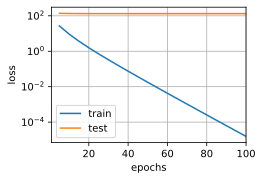

In [5]:
train(lambd=0)

l1 norm of w: 0.34692245721817017


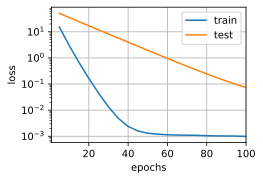

In [6]:
train(lambd=3)

In [7]:
def train_torch(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    # The bias parameter has not decayed. Bias names generally end with "bias"
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)

    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], legend=['train', 'test'])
    for epoch in range(1, num_epochs+1):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if epoch % 5 == 0:
            animator.add(epoch, (d2l.evaluate_loss(net, train_iter, loss),
                                 d2l.evaluate_loss(net, test_iter, loss)))
    print('L1 norm of w:', net[0].weight.norm().item())

L1 norm of w: 13.793976783752441


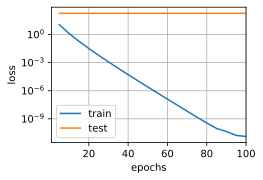

In [8]:
train_torch(0)

L1 norm of w: 0.378697007894516


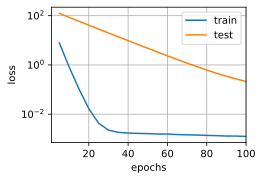

In [9]:
train_torch(3)